In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2020-10-22 15:48:44,489 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'state'
opt_vars = ['marginal_cost_mwh']
scenarios = ['StdScen19_High_RE_Cost', 'StdScen19_Low_RE_Cost', 'StdScen19_Mid_Case']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')


In [3]:
Viz = vapor.Visualizer(results=results, aggregate_region=aggregate_region)

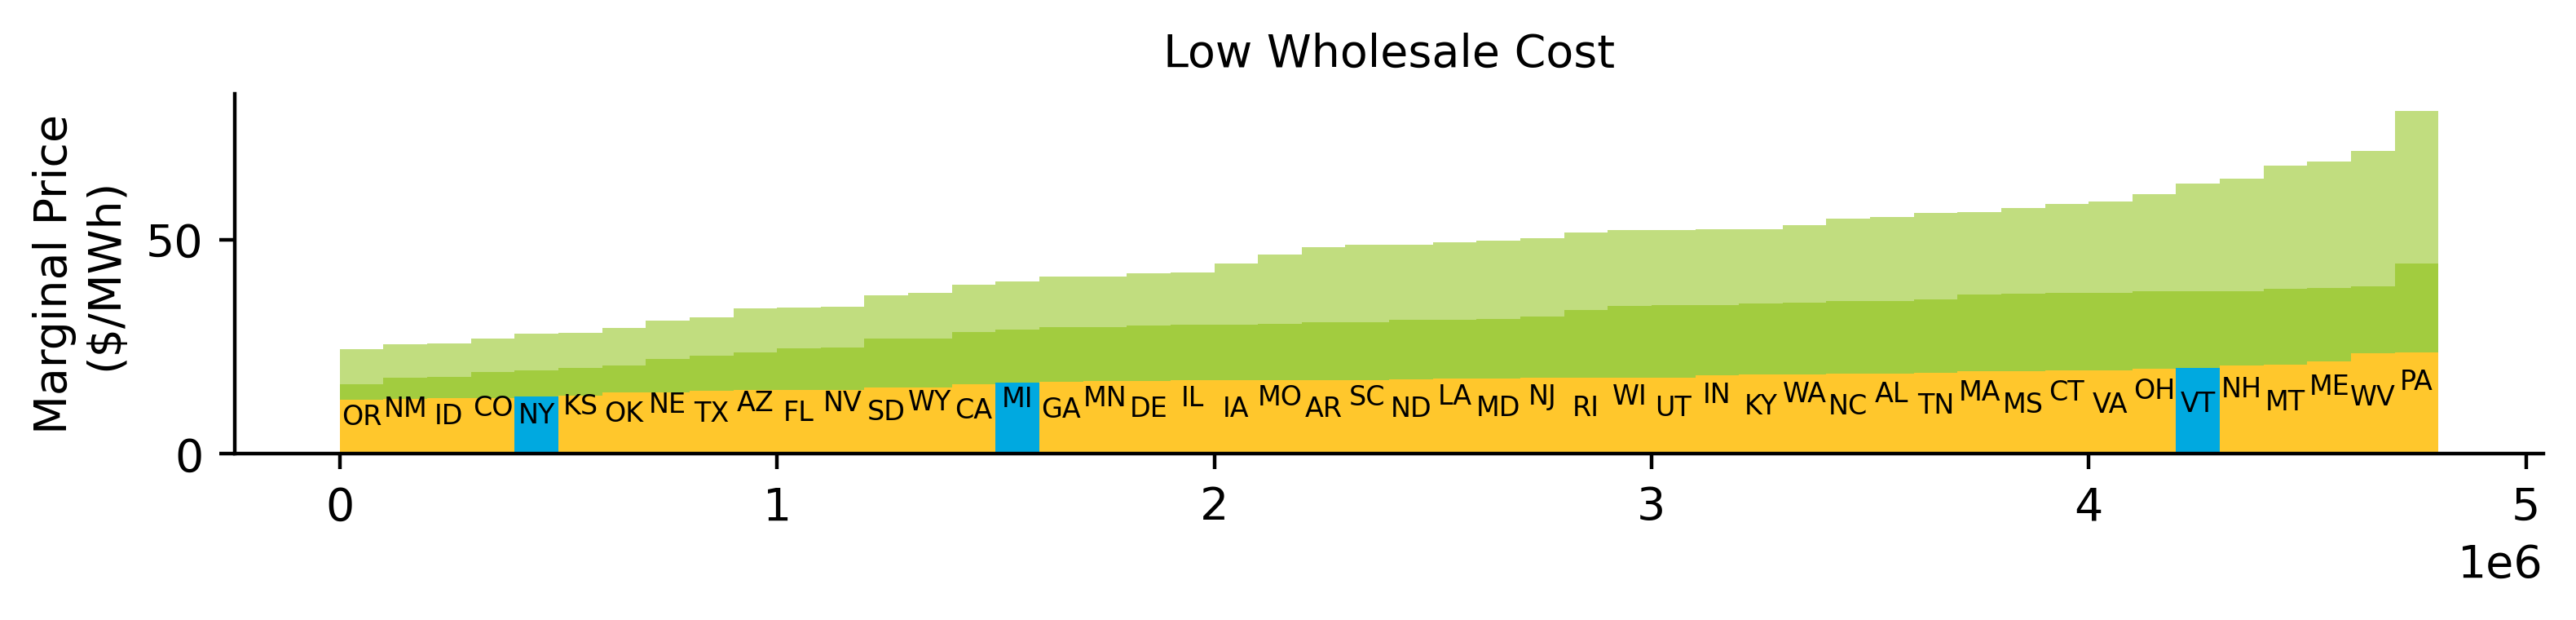

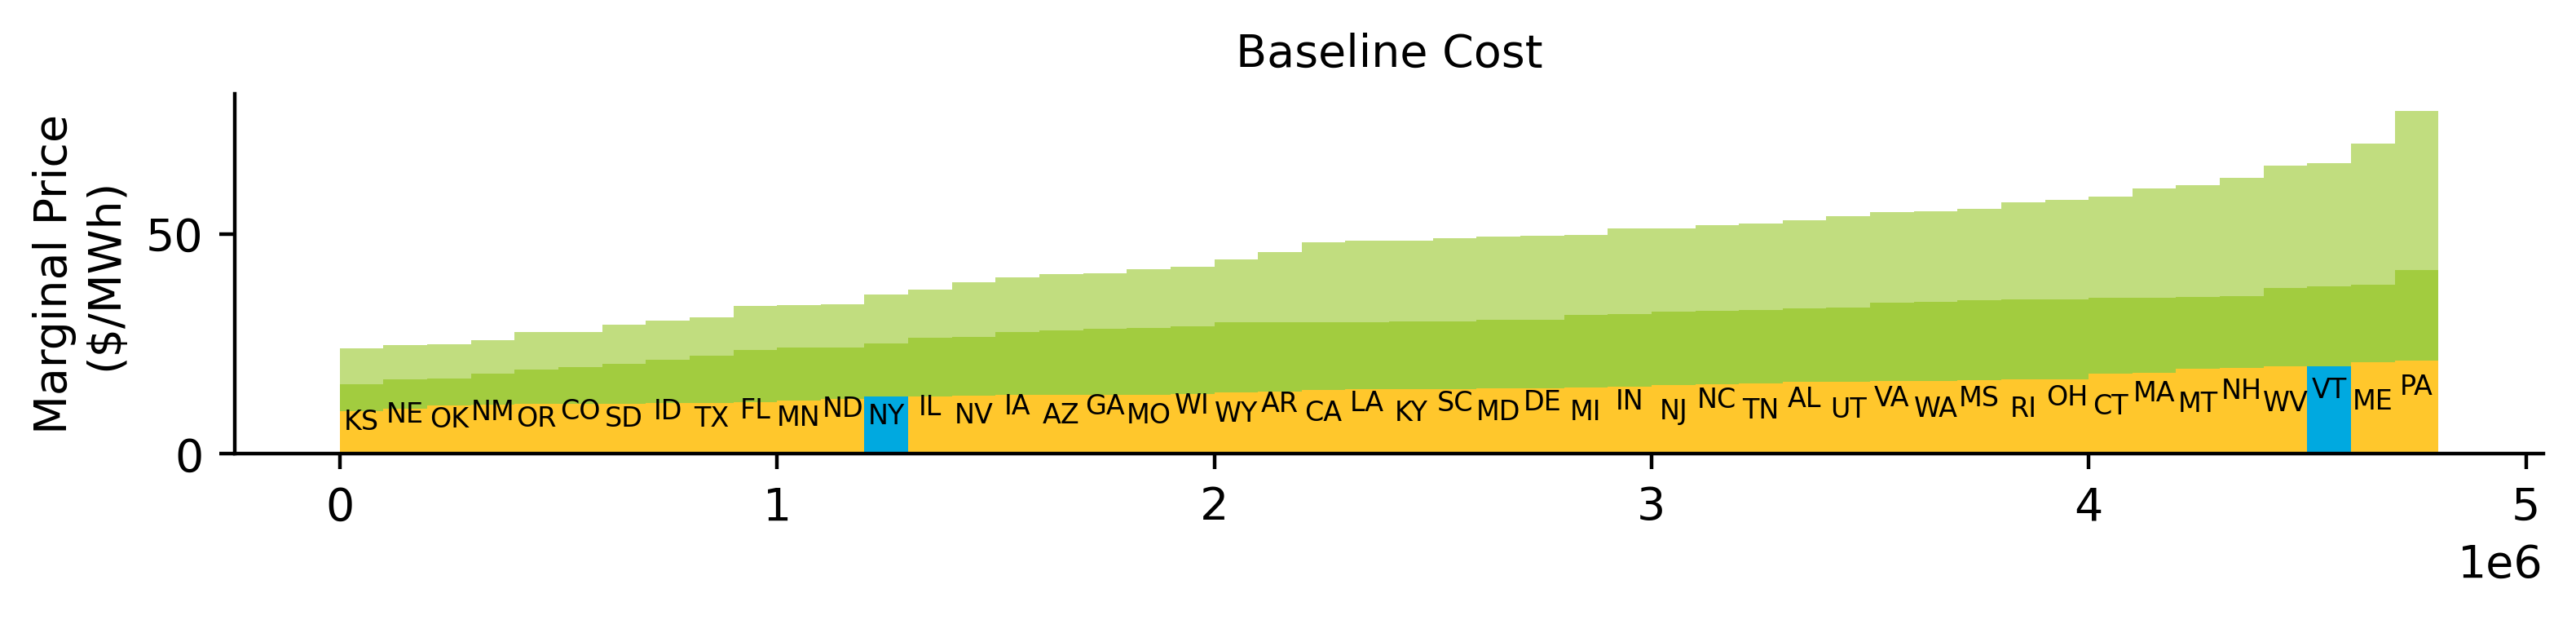

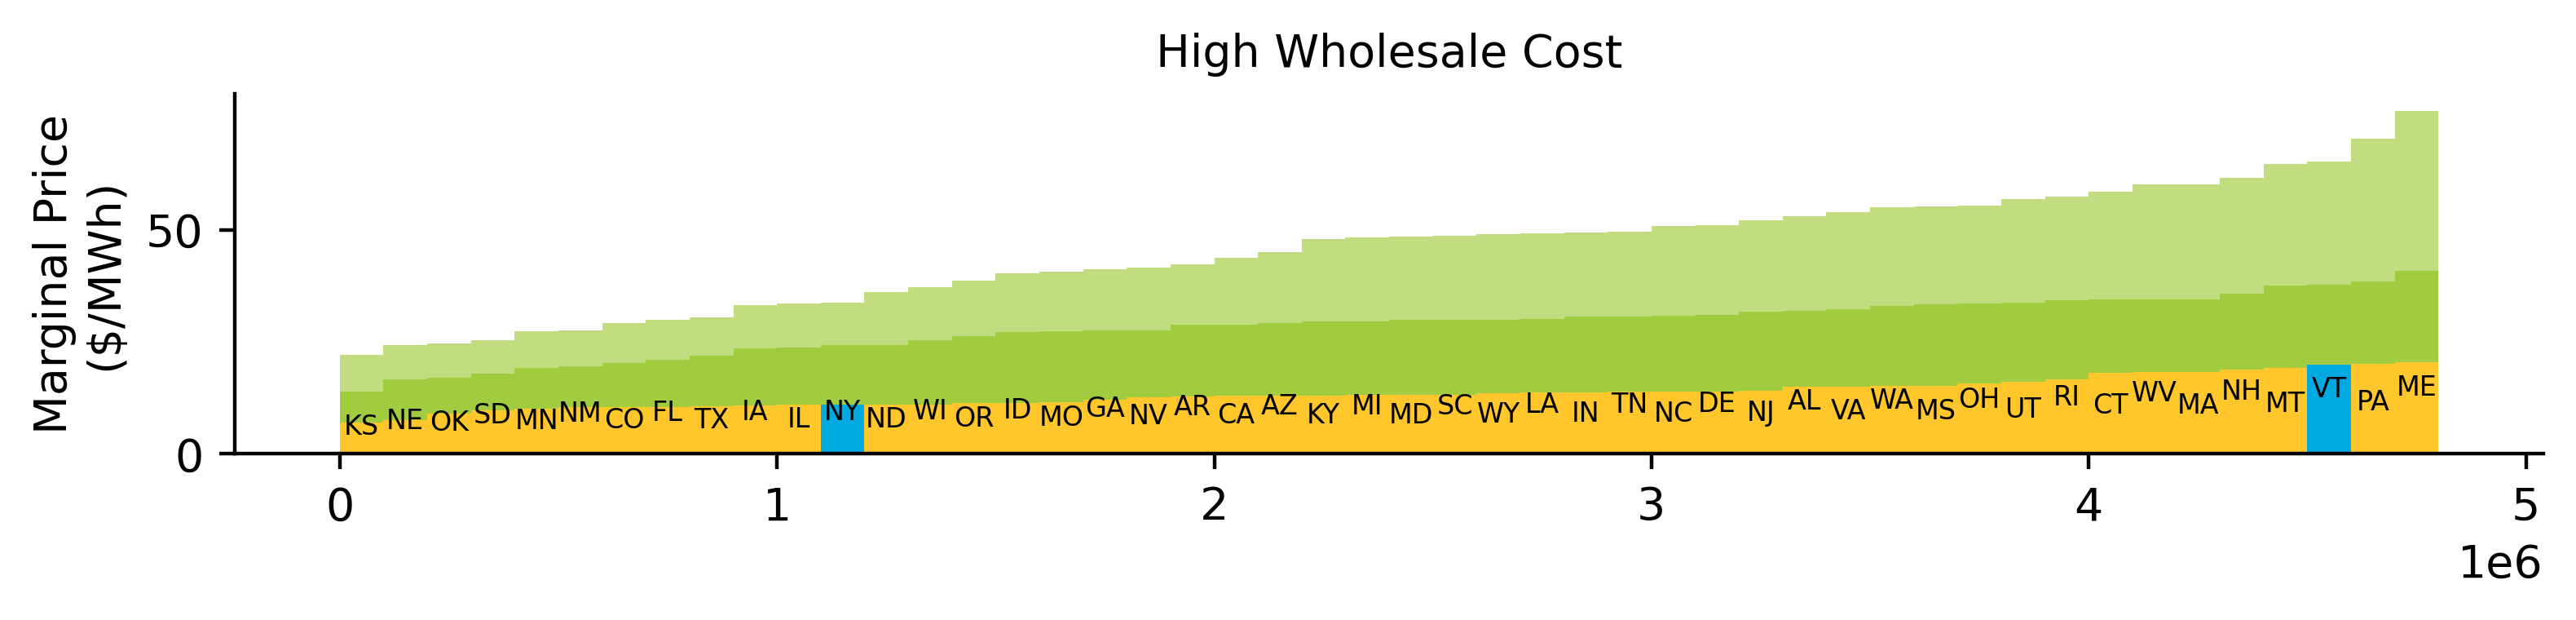

In [16]:
opt_var = 'marginal_cost_mwh'
Viz.supply_curve(opt_var, 'StdScen19_Low_RE_Cost', batt_sizes=[25, 100], legend=False)
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False)
Viz.supply_curve(opt_var, 'StdScen19_High_RE_Cost', batt_sizes=[25, 100], legend=False)

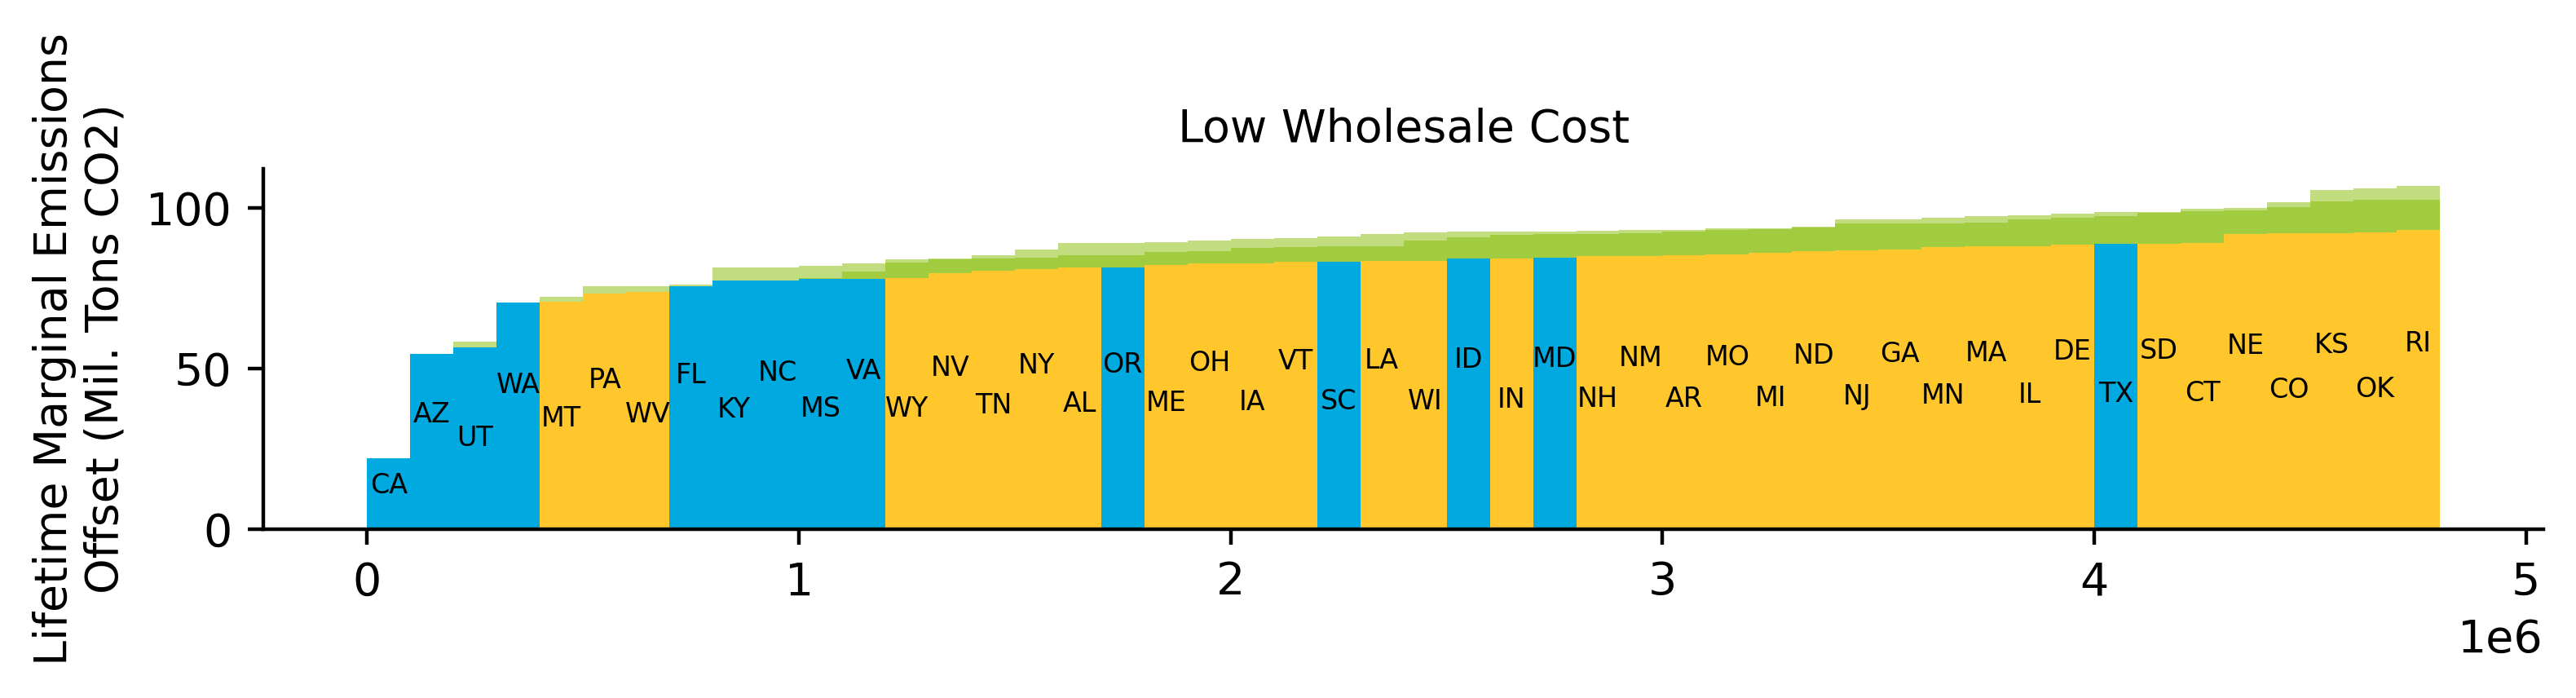

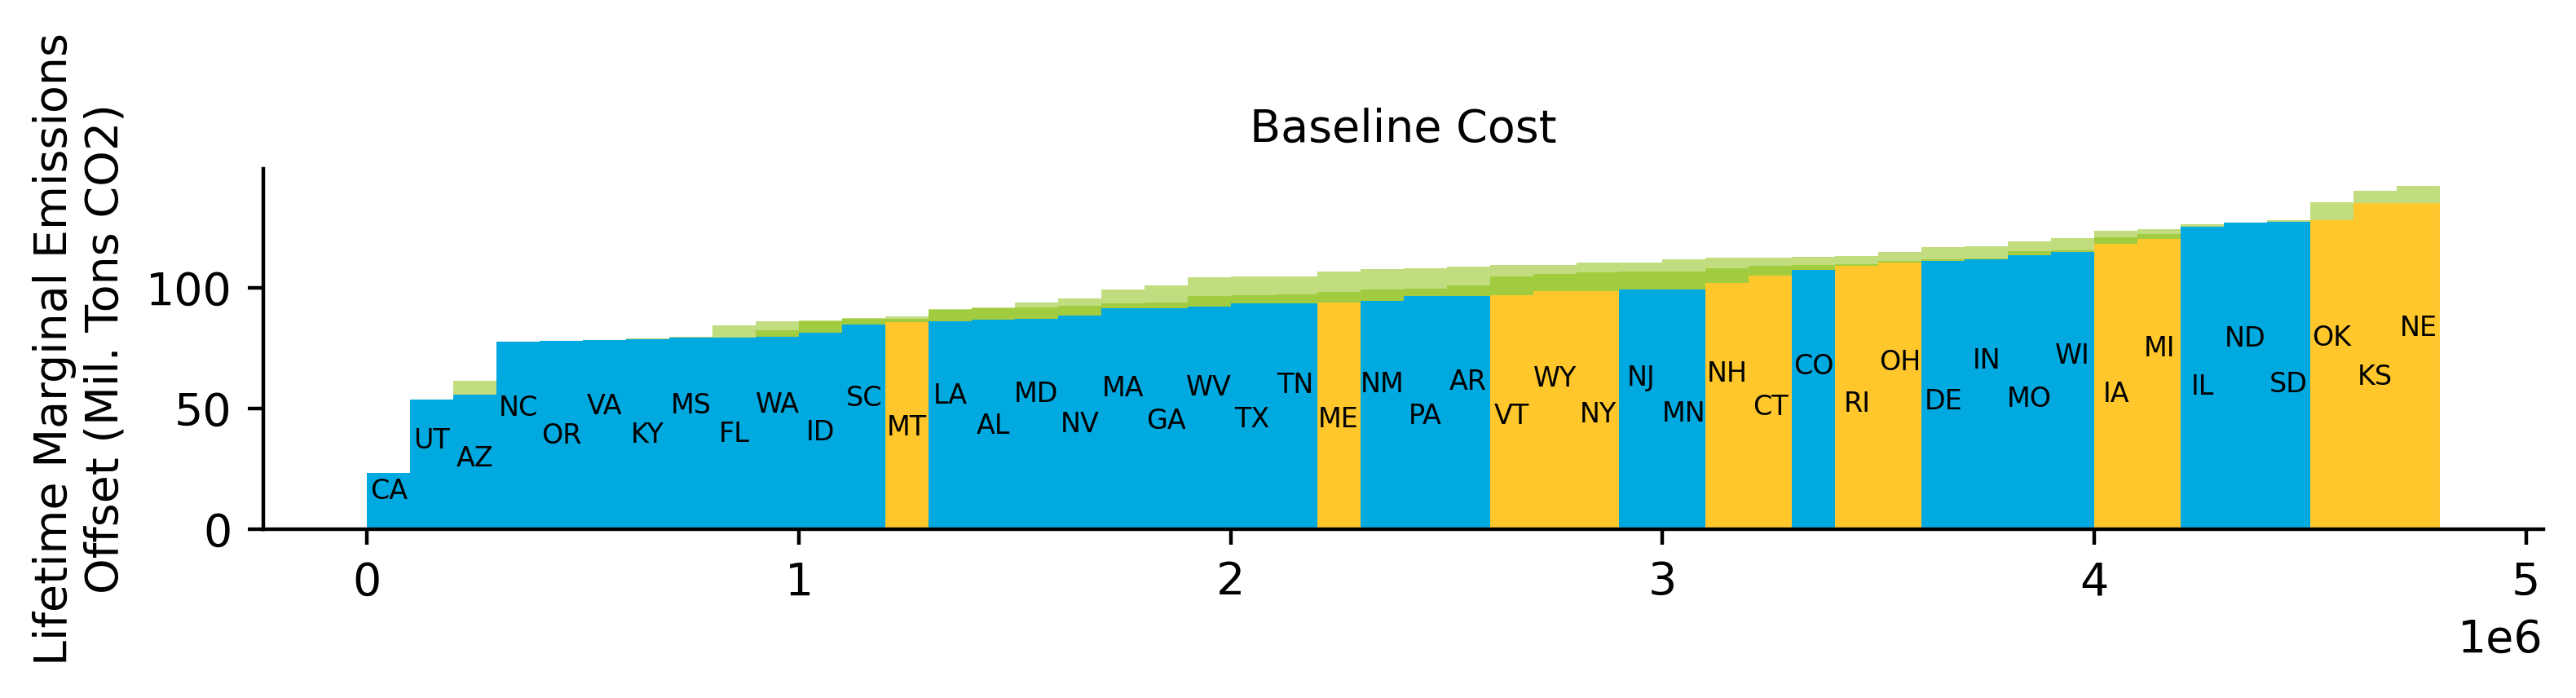

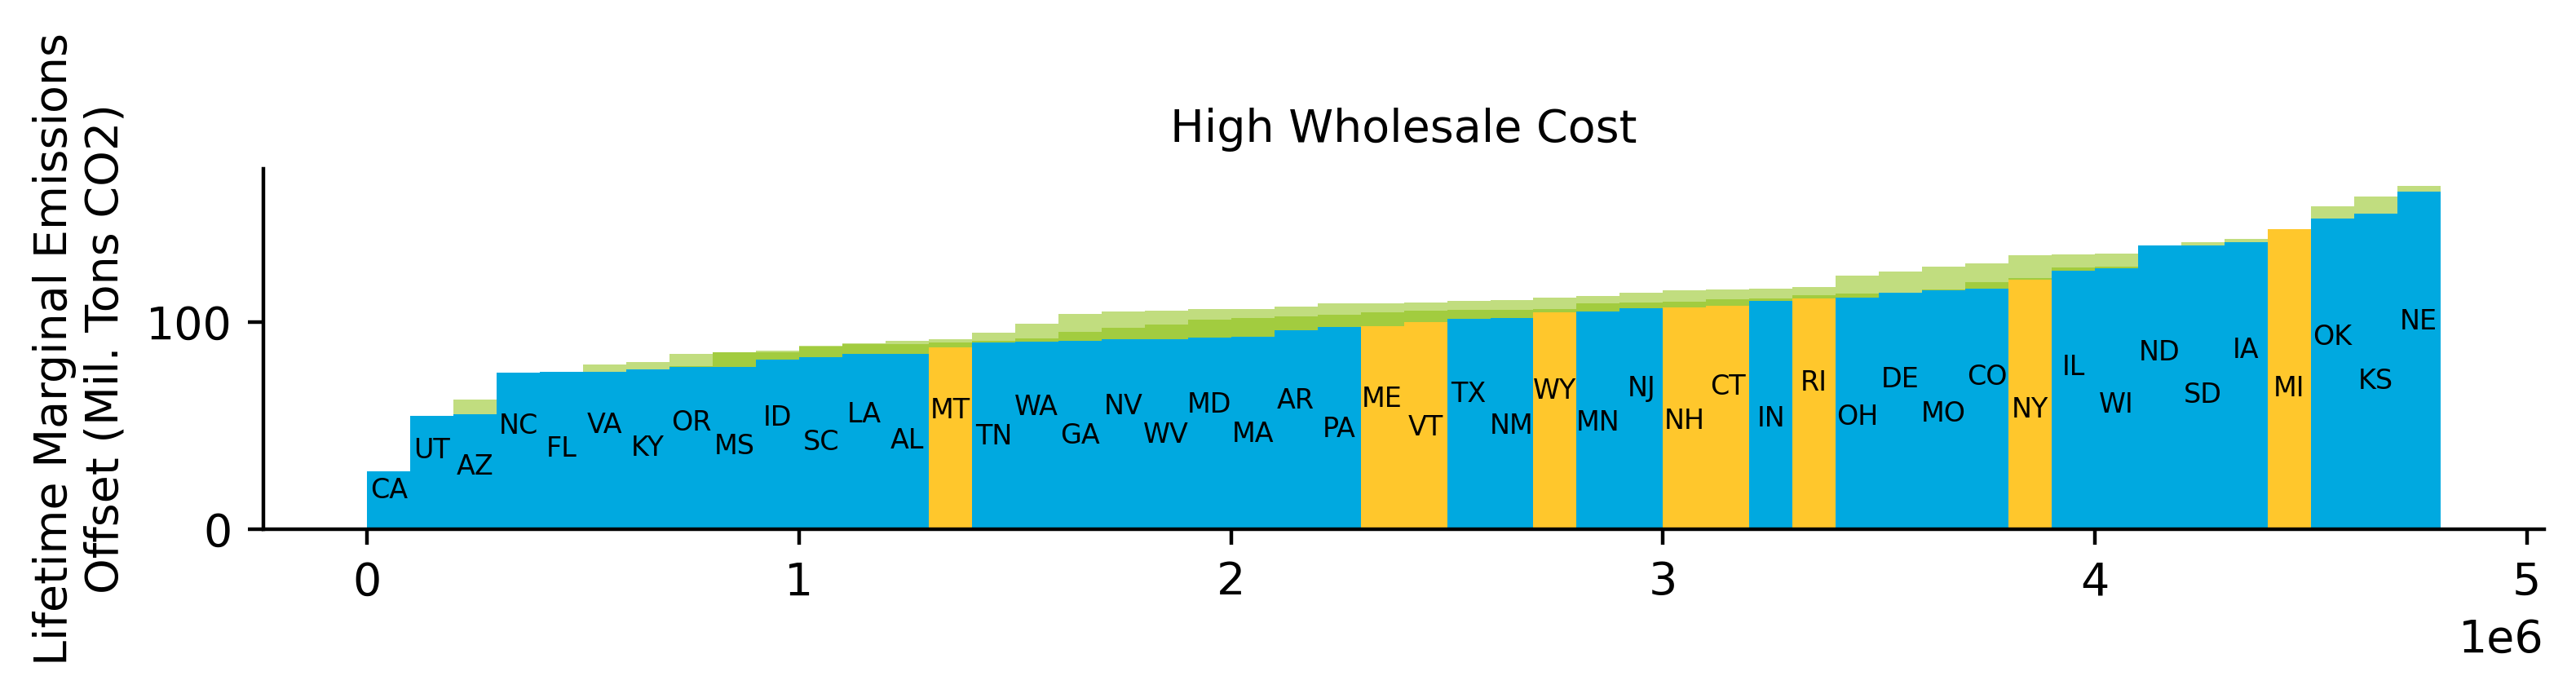

In [5]:
opt_var = 'lifetime_co2_rate_marginal'
label = 'Lifetime Marginal Emissions\nOffset (Mil. Tons CO2)'
Viz.supply_curve(opt_var, 'StdScen19_Low_RE_Cost', batt_sizes=[25, 100], legend=False, label=label)
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False, label=label)
Viz.supply_curve(opt_var, 'StdScen19_High_RE_Cost', batt_sizes=[25, 100], legend=False, label=label)

In [15]:
grouped = results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['marginal_cost_mwh','lifetime_cambium_total_value','lifetime_co2_rate_avg']].mean()
grouped[['lifetime_co2_rate_avg','lifetime_cambium_total_value']] /= 1e6

rename_dict = {'StdScen19_High_RE_Cost':'High Cost', 'StdScen19_Mid_Case':'Mid Cost', 'StdScen19_Low_RE_Cost':'Low Cost'}
grouped['scenario'] = grouped['scenario'].map(rename_dict)
grouped['scenario'] = pd.Categorical(grouped['scenario'], categories=['Low Cost', 'Mid Cost', 'High Cost'], ordered=True)

tech_dict = {'pv':'PV', 'wind':'Wind'}
grouped['tech'] = grouped['tech'].map(tech_dict)

grouped.sort_values(['scenario','tech','batt_size'], inplace=True)
grouped.columns = ['Scenario','Tech','Batt Size (MW)', 'Marginal Cost ($/MWh)', 'Lifetime Cambium Grid Value (mill. $)', 'Lifetime Avoided CO2 (mill. lbs)']
grouped.to_csv(os.path.join('images','supply_curve_table.csv'))
grouped


,Scenario,Tech,Batt Size (MW),Marginal Cost ($/MWh),Lifetime Cambium Grid Value (mill. $),Lifetime Avoided CO2 (mill. lbs)
6,Low Cost,PV,0.0,17.637387,85.275580,84.954127
7,Low Cost,PV,25.0,35.596198,92.082869,91.632078
8,Low Cost,PV,100.0,65.260379,92.209111,91.713592
9,Low Cost,Wind,0.0,39.953763,99.459262,98.849335
10,Low Cost,Wind,25.0,45.112659,100.829749,100.215827
11,Low Cost,Wind,100.0,58.064069,107.114239,106.457409
12,Mid Cost,PV,0.0,15.037576,112.838828,112.597826
13,Mid Cost,PV,25.0,33.168469,117.318818,116.988843
14,Mid Cost,PV,100.0,63.366759,112.387975,112.032298
15,Mid Cost,Wind,0.0,39.760532,103.254554,102.898576


In [9]:
# spaghetti plot of existing 'lifetime_cambium_total_value' through 2050
# spaghetti plot of existing co2 through 2050 